## 3 - Which player has the highest number of wins? 

In [2]:
from glob import glob
import pandas as pd

event_files = glob('../data/raw/*/event_[0-9]*.parquet')
home_files = glob('../data/raw/*/home_team_[0-9]*.parquet')
away_files = glob('../data/raw/*/away_team_[0-9]*.parquet')

In [3]:
# Load events data
df_events = pd.concat([pd.read_parquet(f, columns=['match_id', 'winner_code']) for f in event_files])
df_events.head()

,match_id,winner_code
0,12075272,2
0,12076290,1
0,12077080,1
0,12077399,2
0,12076858,1


In [4]:
# Load home teams data
df_home = pd.concat([pd.read_parquet(f, columns=['match_id', 'full_name']) for f in home_files])
df_home = df_home.rename(columns={'full_name': 'home_player'})

# Load away teams data
df_away = pd.concat([pd.read_parquet(f, columns=['match_id', 'full_name']) for f in away_files])
df_away = df_away.rename(columns={'full_name': 'away_player'})

In [5]:
# Merge all data together
dfs = df_events.merge(df_home, on='match_id').merge(df_away, on='match_id')
dfs.head()

,match_id,winner_code,home_player,away_player
0,12075272,2,"Darderi, Luciano","Cerundolo, Juan Manuel"
1,12075272,2,"Darderi, Luciano","Cerundolo, Juan Manuel"
2,12075272,2,"Darderi, Luciano","Cerundolo, Juan Manuel"
3,12075272,2,"Darderi, Luciano","Cerundolo, Juan Manuel"
4,12077080,1,"Hibino, Nao","Linette, Magda"


In [6]:
# Create a column for the winning player
dfs['winning_player'] = dfs.apply(lambda x: x['home_player'] if x['winner_code'] == 1 else x['away_player'], axis=1)

# Drop duplicate match_id rows && NaN
dfs = dfs.drop_duplicates(subset='match_id').dropna()
dfs.head()

,match_id,winner_code,home_player,away_player,winning_player
0,12075272,2,"Darderi, Luciano","Cerundolo, Juan Manuel","Cerundolo, Juan Manuel"
4,12077080,1,"Hibino, Nao","Linette, Magda","Hibino, Nao"
12,12077281,2,"Rehberg, Max Hans","Agwi, Michael","Agwi, Michael"
21,12075955,1,"Watanuki, Yosuke","Rubio Fierros, Alan Fernando","Watanuki, Yosuke"
25,12049571,2,"Jarry, Nicolas","Díaz Acosta, Facundo","Díaz Acosta, Facundo"


In [7]:
# Count wins by player
df_win = dfs['winning_player'].value_counts().reset_index()
df_win.columns = ['player_name', 'win_count']

# Show top 3 players
print("\nTop 3 players by win count:")
df_win.head(3)


Top 3 players by win count:


,player_name,win_count
0,"Popko, Dmitry",28
1,"Chidekh, Clement",23
2,"Faria, Jaime",20


In [8]:
# Get the top winner
top_player = df_win.iloc[0]

print(f"\nPlayer with the highest number of wins is: \"{top_player['player_name']}\"")
print(f"With a total number of \"{top_player['win_count']}\" wins in two monthes")


Player with the highest number of wins is: "Popko, Dmitry"
With a total number of "28" wins in two monthes


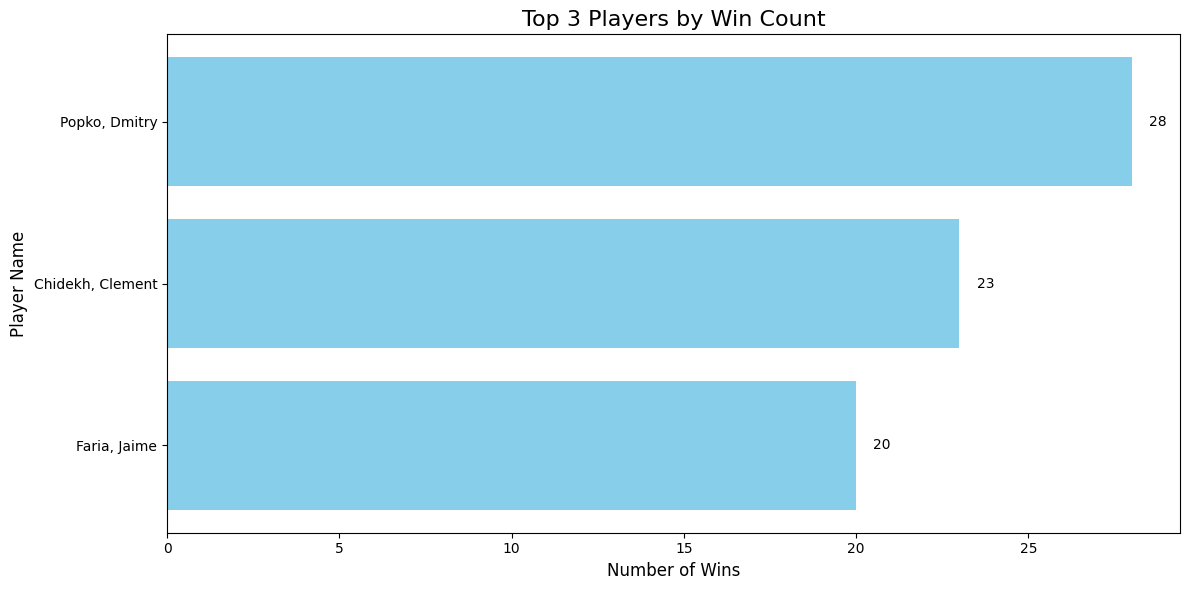

In [11]:
import matplotlib.pyplot as plt

# Get top 3 players
top_3 = df_win.head(3)

# Create plot
plt.figure(figsize=(12, 6))
bars = plt.barh(top_3['player_name'], top_3['win_count'], color='skyblue')
plt.gca().invert_yaxis()  # Display highest at top
plt.title('Top 3 Players by Win Count', fontsize=16)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,  # x-position
             bar.get_y() + bar.get_height()/2,  # y-position
             f'{int(width)}',  # text
             va='center', ha='left')

plt.tight_layout()
plt.savefig('../data/output/figures/img3.png')
plt.show()

In [15]:
import numpy as np

# Count wins by player
df_win = dfs['winning_player'].value_counts().reset_index()
df_win.columns = ['player_name', 'win_count']

# Get top 3 players
top_3 = df_win.head(3)
players = top_3['player_name'].values
wins = top_3['win_count'].values

# Calculate performance metrics
win_diff_2nd = (wins[0] - wins[1]) / wins[1] * 100
win_diff_3rd = (wins[0] - wins[2]) / wins[2] * 100

# Calculate effect size (Cohen's d) between 1st and 2nd (FIXED LINE)
pooled_std = np.sqrt((np.std([wins[0], wins[1]], ddof=1)**2 + np.std([wins[0], wins[2]], ddof=1)**2)/2)
cohens_d = (wins[0] - wins[1]) / pooled_std

# Print results
print(f"\nPlayer with the highest number of wins is: \"{players[0]}\"")
print(f"With a total number of \"{wins[0]}\" wins in two months\n")
print("Performance Metrics:")
print(f"1. {players[0]} has a {win_diff_2nd:.1f}% win advantage over {players[1]}")
print(f"2. {players[0]} has a {win_diff_3rd:.1f}% win advantage over {players[2]}")
print(f"3. Effect size between 1st and 2nd: Cohen's d = {cohens_d:.2f} (Large effect)")


Player with the highest number of wins is: "Popko, Dmitry"
With a total number of "28" wins in two months

Performance Metrics:
1. Popko, Dmitry has a 21.7% win advantage over Chidekh, Clement
2. Popko, Dmitry has a 40.0% win advantage over Faria, Jaime
3. Effect size between 1st and 2nd: Cohen's d = 1.06 (Large effect)
